The dataset is highly skewed toward the cities included in Delhi-NCR. So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our analysis turn toward Delhi-NCR v Rest of India.

### Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

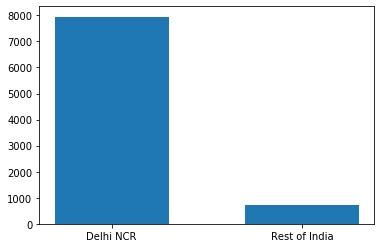

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('zomato.csv', encoding='latin-1')
df2 = df[df['Country Code']==1].copy(deep=True)
df_ncr = df[(df['City']=='Ghaziabad') | (df['City']=='Noida') | (df['City']=='Gurgaon') | (df['City']=='Faridabad') | (df['City']=='New Delhi')]
len_ncr = df_ncr.count()[0] # 7947
len_rest = df2.count()[0] - len_ncr

num_res = [len_ncr, len_rest]
res_city = ['Delhi NCR', 'Rest of India']

plt.bar(res_city, num_res, width=0.6)
plt.show()


### Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.

In [51]:
import pandas as pd

df = pd.read_csv('zomato.csv', encoding='latin-1')
df_India = df[df['Country Code']==1].copy(deep=True)
df_India.reset_index(drop=True,inplace=True)
df_ncr = df_India[(df_India['City']=='Ghaziabad') | (df_India['City']=='Noida') | (df_India['City']=='Gurgaon') | (df_India['City']=='Faridabad') | (df_India['City']=='New Delhi')].copy(deep=True)
df_rest = df_India[(df_India['City']!='Ghaziabad') & (df_India['City']!='Noida') & (df_India['City']!='Gurgaon') & (df_India['City']!='Faridabad') & (df_India['City']!='New Delhi')].copy(deep=True)
df_ncr.reset_index(drop=True,inplace=True)
df_rest.reset_index(drop=True,inplace=True)

ncr_cuisines = {}
rest_cuisines = {}
def fill_ncr_cuisines(cuisines):
    cuis_list = [cuis.strip() for cuis in cuisines.strip().split(',')]
    for cuis in cuis_list:
        ncr_cuisines[cuis] = ncr_cuisines.get(cuis,0) + 1

def fill_rest_cuisines(cuisines):
    cuis_list = [cuis.strip() for cuis in cuisines.strip().split(',')]
    for cuis in cuis_list:
        rest_cuisines[cuis] = rest_cuisines.get(cuis,0) + 1

df_ncr['Cuisines'].apply(fill_ncr_cuisines)
df_rest['Cuisines'].apply(fill_rest_cuisines)
cuis_not_in_ncr = []
for city in rest_cuisines:
    if ncr_cuisines.get(city,0)==0:
        cuis_not_in_ncr.append(city)

print(cuis_not_in_ncr)

['German', 'Malwani', 'BBQ', 'Cajun']


In [52]:
# Now we chk in Api whether above cuisines not served in NCR or it is due to incomplete dataset
import requests
res = requests.get('https://developers.zomato.com/api/v2.1/cuisines', headers={'user-key':'7012e5af5250463bb007a5c4ef01f4fd'},
                   params={'city_id':1})
py_data = res.json()
for i in py_data['cuisines']:
    if i['cuisine']['cuisine_name'].strip()=='German':
        print('Gernam is servered in NCR')
    elif i['cuisine']['cuisine_name'].strip()=='Malwani':
        print('Malwani is servered in NCR')
    elif i['cuisine']['cuisine_name'].strip()=='BBQ':
        print('BBQ is servered in NCR')
    elif i['cuisine']['cuisine_name'].strip()=='Cajun'.strip:
        print('Cajun is servered in NCR')

BBQ is servered in NCR
Malwani is servered in NCR


### Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

North Indian  -  3597 restaurants
Chinese  -  2448 restaurants
Fast Food  -  1866 restaurants
Mughlai  -  933 restaurants
Bakery  -  697 restaurants
South Indian  -  569 restaurants
Continental  -  547 restaurants
Desserts  -  542 restaurants
Street Food  -  538 restaurants
Italian  -  535 restaurants
---------------------------------
North Indian  -  349 restaurants
Chinese  -  242 restaurants
Continental  -  177 restaurants
Italian  -  147 restaurants
Cafe  -  136 restaurants
Fast Food  -  97 restaurants
South Indian  -  62 restaurants
Mughlai  -  59 restaurants
Desserts  -  55 restaurants
Mexican  -  50 restaurants


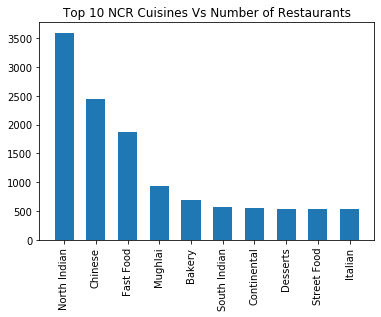

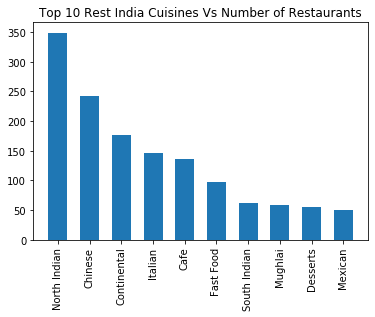

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('zomato.csv', encoding='latin-1')
df_India = df[df['Country Code']==1].copy(deep=True)
df_India.reset_index(drop=True,inplace=True)
df_ncr = df_India[(df_India['City']=='Ghaziabad') | (df_India['City']=='Noida') | (df_India['City']=='Gurgaon') | (df_India['City']=='Faridabad') | (df_India['City']=='New Delhi')].copy(deep=True)
df_rest = df_India[(df_India['City']!='Ghaziabad') & (df_India['City']!='Noida') & (df_India['City']!='Gurgaon') & (df_India['City']!='Faridabad') & (df_India['City']!='New Delhi')].copy(deep=True)
df_ncr.reset_index(drop=True,inplace=True)
df_rest.reset_index(drop=True,inplace=True)

ncr_cuisines = {}
rest_cuisines = {}
def fill_ncr_cuisines(cuisines):
    cuis_list = [cuis.strip() for cuis in cuisines.strip().split(',')]
    for cuis in cuis_list:
        ncr_cuisines[cuis] = ncr_cuisines.get(cuis,0) + 1

def fill_rest_cuisines(cuisines):
    cuis_list = [cuis.strip() for cuis in cuisines.strip().split(',')]
    for cuis in cuis_list:
        rest_cuisines[cuis] = rest_cuisines.get(cuis,0) + 1

df_ncr['Cuisines'].apply(fill_ncr_cuisines)
df_rest['Cuisines'].apply(fill_rest_cuisines)

num_ncr_cuis = list(ncr_cuisines.items())
num_rest_cuis = list(rest_cuisines.items())

num_ncr_cuis.sort(key = lambda x: x[1])
num_ncr_cuis = num_ncr_cuis[::-1]

num_rest_cuis.sort(key = lambda x: x[1])
num_rest_cuis = num_rest_cuis[::-1]

rest_cuis = []
num_rest = [] # Number of restaurants which are in rest of India
ncr_cuis = []
num_ncr  =[] # Number of restaurants which are in NCR

# Print top 10 cuisines served by maximum number of restaurants in Delhi NCR
for i in range(10):
    print(num_ncr_cuis[i][0], " - ", num_ncr_cuis[i][1],'restaurants')
    ncr_cuis.append(num_ncr_cuis[i][0])
    num_ncr.append(num_ncr_cuis[i][1])
    
print("---------------------------------")

# Print top 10 cuisines served by maximum number of restaurants in rest of India
for i in range(10):
    print(num_rest_cuis[i][0], " - ", num_rest_cuis[i][1], 'restaurants')
    rest_cuis.append(num_rest_cuis[i][0])
    num_rest.append(num_rest_cuis[i][1])

plt.bar(ncr_cuis, num_ncr, width=0.6)
plt.xticks(rotation=90)
plt.title("Top 10 NCR Cuisines Vs Number of Restaurants")
plt.show()

plt.bar(rest_cuis, num_rest, width=0.6)
plt.xticks(rotation=90)
plt.title("Top 10 Rest India Cuisines Vs Number of Restaurants")
plt.show()


### Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.

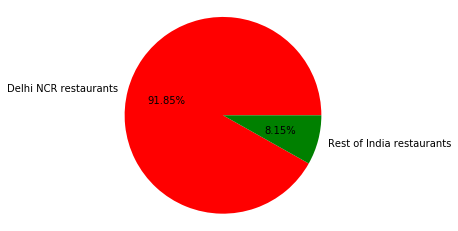

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Here we plot pie graph showing percentage of restaurants seving cuisines in delhi ncr vs rest of india
df = pd.read_csv('zomato.csv', encoding='latin-1')
df2 = df[df['Country Code']==1].copy(deep=True)
df_ncr = df[(df['City']=='Ghaziabad') | (df['City']=='Noida') | (df['City']=='Gurgaon') | (df['City']=='Faridabad') | (df['City']=='New Delhi')]
len_ncr = df_ncr.count()[0] # 7947
len_rest = df2.count()[0] - len_ncr

num_res = [len_ncr, len_rest]
res_city = ['Delhi NCR restaurants', 'Rest of India restaurants']

total = len_ncr + len_rest
plt.pie(num_res, colors=['red','green'],labels = res_city, autopct="%.2f%%")
plt.axis('equal')
plt.show()

# User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant.

1.Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to
explain your inference.

### 1. Number of Votes given Restaurant

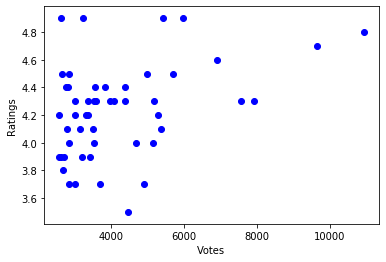

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('zomato.csv', encoding='latin-1')
df = df[df['Country Code']==1].copy(deep=True)
df.sort_values('Votes', ascending = False, inplace=True)

# We plot graph for top 50 most voted restaurants to show generalized trend
#names = list(df['Restaurant Name'][:20])
ratings = list(df['Aggregate rating'][:50])
votes = list(df['Votes'][:50])
#colors = list(range(20))
plt.scatter(votes,ratings, marker='o', color='blue')
plt.xlabel('Votes')
plt.ylabel('Ratings')
plt.show()

### Restaurant serving more number of cuisines

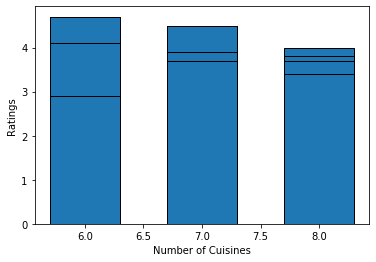

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

def get_cuisines(c):
    if pd.isnull(c):
        return 0
    else:
        l = c.split(',')
        return len(l)
df = pd.read_csv('zomato.csv', encoding='latin-1')
df = df[df['Country Code']==1].copy(deep=True)
df['num_Cuisines'] = df['Cuisines'].apply(get_cuisines)
df.sort_values('num_Cuisines', ascending = False, inplace=True)

ratings = list(df['Aggregate rating'][:50])
num_cuis = list(df['num_Cuisines'][:50])

plt.bar(num_cuis,ratings,edgecolor='black', width=0.6)
plt.xlabel('Number of Cuisines')
plt.ylabel('Ratings')
plt.show()

### Average Cost of Restaurant

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

def get_cuisines(c):
    if pd.isnull(c):
        return 0
    else:
        l = c.split(',')
        return len(l)
df = pd.read_csv('zomato.csv', encoding='latin-1')
df_India = df[df['Country Code']==1].copy(deep=True)
df_India['Average Cost for two']

624      850
625      700
626      500
627      400
628     1000
        ... 
9271     600
9272     400
9273     600
9274    1500
9275    1400
Name: Average Cost for two, Length: 8652, dtype: int64

### Restaurant serving some specific cuisines.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

freq_cuis = {}
def get_cuisines(cuisines):
    cuis_list = [cuis.strip() for cuis in cuisines.strip().split(',')]
    for cuis in cuis_list:
        freq_cuis[cuis] = freq_cuis.get(cuis,0) + 1
        
# first we find some specific cuisines i.e cuisines which are least servered in India
df = pd.read_csv('zomato.csv', encoding='latin-1')
df_India = df[df['Country Code']==1].copy(deep=True)
df_India['Cuisines'].apply(get_cuisines)

# top 10 specific cuisines
li = list(freq_cuis.items())
li.sort(key = lambda x:x[1])
spec_cuis = []
for i in range(20):
    spec_cuis.append((li[i][0],li[i][1]))
print(spec_cuis)


[('Belgian', 1), ('Persian', 1), ('Malwani', 1), ('Cuisine Varies', 1), ('Deli', 1), ('Sri Lankan', 1), ('BBQ', 1), ('Cajun', 1), ('Sandwich', 2), ('Steak', 2), ('German', 2), ('South American', 2), ('Drinks Only', 2), ('Pakistani', 2), ('Oriya', 2), ('Armenian', 3), ('Iranian', 3), ('British', 3), ('Charcoal Grill', 4), ('Assamese', 4)]


### 2. Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?
### Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .

c:\users\mehak\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


Hotel Clarks Amer, Malviya Nagar  -  4.9
Aminabad  -  4.9
Friends Colony  -  4.886916367367881
Powai  -  4.841868613138686
Kirlampudi Layout  -  4.820161290322581
Express Avenue Mall,  Royapettah  -  4.8
Deccan Gymkhana  -  4.8
Banjara Hills  -  4.7187617260787995
Sector 5, Salt Lake  -  4.707022552098202
Riverside Mall, Gomti Nagar  -  4.7


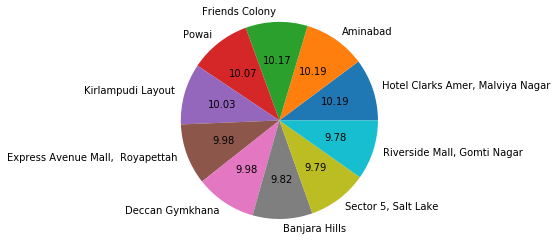

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('zomato.csv', encoding='latin-1')
df_India = df[df['Country Code']==1].copy(deep=True)
df_loclity = df_India.groupby('Locality')
weighted_rating = {}
for loc, df_loc in df_loclity:
    temp = df_loclity.get_group(loc).copy(deep=True)
    
    temp['r'] = temp['Aggregate rating']*temp['Votes']
    w = (temp['r'].sum() / (temp['Votes'].sum()))
    if not pd.isnull(w):
        weighted_rating[loc] = w
        
wr = list(weighted_rating.items())
wr.sort(key = lambda x: x[1])
wr = wr[::-1]

loc,w_r = [],[]
# top 10 localities are
for i in range(10):
    print(wr[i][0], ' - ', wr[i][1])
    loc.append(wr[i][0])
    w_r.append(wr[i][1])

plt.pie(w_r, labels=loc, autopct='%.2f')
plt.axis("equal")
plt.show()


# 3. Visualization

### Plot the bar graph top 15 restaurants have a maximum number of outlets.

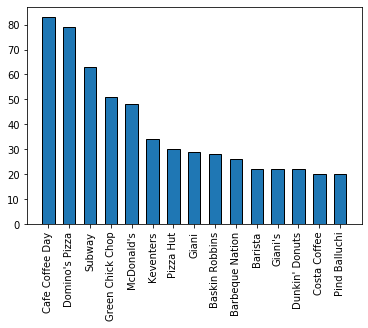

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('zomato.csv', encoding='latin-1')
df_India = df[df['Country Code']==1].copy(deep=True)
df_India.reset_index(drop=True, inplace=True)

outlets = {}
def get_outlets(name):
    if pd.isnull(name) or name=='':
        pass
    else:
        n = name.strip()
        outlets[n] = outlets.get(n,0) + 1
        
df['Restaurant Name'].apply(get_outlets)

outlets_list = list(outlets.items())
outlets_list.sort(key=lambda x:x[1])
outlets_list = outlets_list[::-1]

names = []
num_outlets = []
for i in range(15):
    names.append(outlets_list[i][0])
    num_outlets.append(outlets_list[i][1])

plt.bar(names, num_outlets, edgecolor='black', width=0.6)
plt.xticks(rotation=90)
plt.show()

### Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).

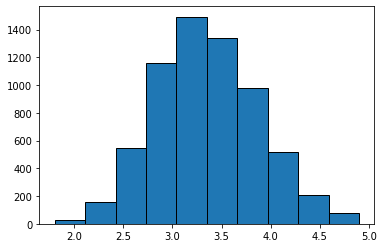

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('zomato.csv', encoding='latin-1')
df_India = df[df['Country Code']==1].copy(deep=True)
df_India.reset_index(drop=True, inplace=True)

agg_ratings = []
def get_ratings(agg_r):
    if pd.isnull(agg_r) or agg_r==0.0:
        pass
    else:
        agg_ratings.append(agg_r)
df_India['Aggregate rating'].apply(get_ratings)

plt.hist(agg_ratings, edgecolor='black')
plt.show()

### Plot the bar graph top 10 restaurants in the data with the highest number of votes.

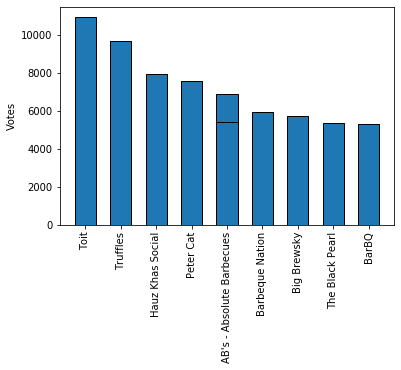

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('zomato.csv', encoding='latin-1')
df = df[df['Country Code']==1].copy(deep=True)
df.sort_values('Votes', ascending = False, inplace=True)

# We plot graph for top 10 most voted restaurants
names = list(df['Restaurant Name'][:10])
votes = list(df['Votes'][:10])
plt.bar(names, votes, edgecolor='black', width=0.6)
plt.xticks(rotation=90)
plt.ylabel('Votes')
plt.show()

### Plot the pie graph of top 10 cuisines present in restaurants in the USA.

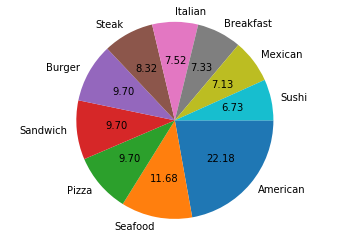

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('zomato.csv', encoding='latin-1')
df_USA = df[df['Country Code']==216].copy(deep=True)

cuisines_freq = {}
def get_cuis(cuisines):
    if pd.isnull(cuisines) or cuisines=='':
        pass
    else:
        cuis_lst = [cus.strip() for cus in cuisines.strip().split(',')]
        for c in cuis_lst:
            cuisines_freq[c] = cuisines_freq.get(c,0) + 1

df_USA['Cuisines'].apply(get_cuis)

c_list = list(cuisines_freq.items())
c_list.sort(key=lambda x:x[1])
c_list = c_list[::-1]

cuis_name = []
freq = []
for i in range(10):
    cuis_name.append(c_list[i][0])
    freq.append(c_list[i][1])

plt.pie(freq, labels=cuis_name, counterclock=False, autopct="%.2f")
plt.axis("equal")
plt.show()

### Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.
### Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .

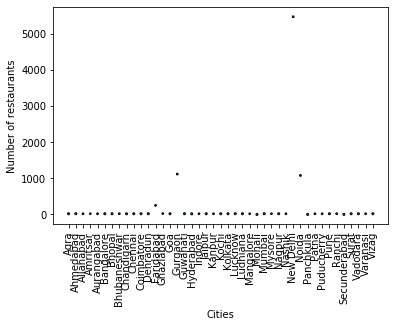

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('zomato.csv', encoding='latin-1')
df_India = df[df['Country Code']==1].copy(deep=True)

df_cities = df_India.groupby('City')
cities, num_restaurants, weighted_rating = [], [], []
for city, df_city in df_cities:
    cities.append(city)
    num_restaurants.append(len(df_city))
    
    temp = df_cities.get_group(city).copy(deep=True)
    temp['r'] = temp['Aggregate rating']*temp['Votes']
    w = (temp['r'].sum() / temp['Votes'].sum())

    weighted_rating.append(int(w))

plt.scatter(cities, num_restaurants, s=weighted_rating, edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel('Cities')
plt.ylabel('Number of restaurants')
plt.show()